<a href="https://colab.research.google.com/github/alex06733/Bode/blob/main/Sprungantwort_berechnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

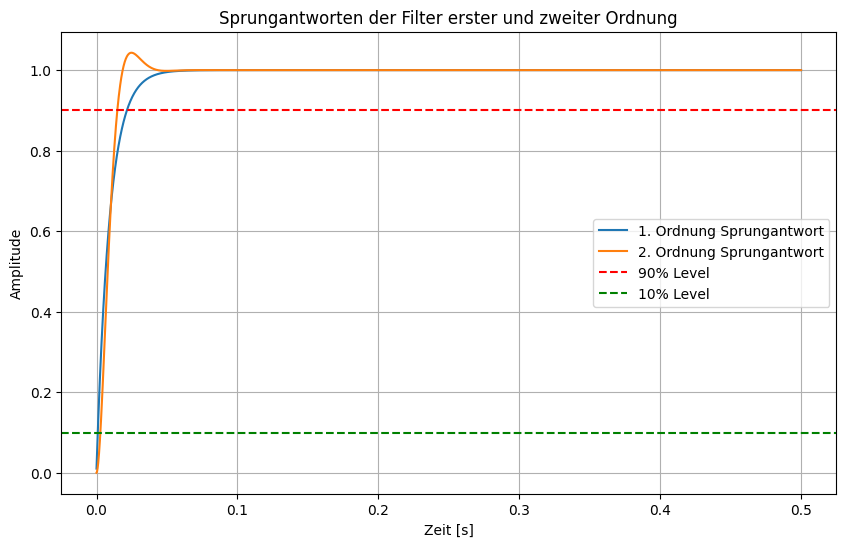

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Filterparameter
sampling_rate = 5000  # Höhere Samplingrate für genauere Zeitsimulation
nyquist_freq = sampling_rate / 2

# Filter erster Ordnung
order1 = 1
cutoff_freq1 = 16.93  # Grenzfrequenz in Hz
normalized_cutoff1 = cutoff_freq1 / nyquist_freq
b1, a1 = signal.butter(order1, normalized_cutoff1, btype='low', analog=False)

# Filter zweiter Ordnung
order2 = 2
cutoff_freq2 = 28.42  # Beispielhafte Grenzfrequenz in Hz
normalized_cutoff2 = cutoff_freq2 / nyquist_freq
b2, a2 = signal.butter(order2, normalized_cutoff2, btype='low', analog=False)

# Zeitachse für die Simulation
t = np.linspace(0, 0.5, int(0.5 * sampling_rate), endpoint=False)

# Sprungantwort erzeugen (Sprung bei t=0)
step_input = np.ones_like(t)

# Filterung der Sprungantwort
response1 = signal.lfilter(b1, a1, step_input)
response2 = signal.lfilter(b2, a2, step_input)

# Plotten der Sprungantworten
plt.figure(figsize=(10, 6))
plt.plot(t, response1, label='1. Ordnung Sprungantwort')
plt.plot(t, response2, label='2. Ordnung Sprungantwort')
plt.axhline(y=0.9, color='r', linestyle='--', label='90% Level')
plt.axhline(y=0.1, color='g', linestyle='--', label='10% Level')

plt.xlabel('Zeit [s]')
plt.ylabel('Amplitude')
plt.title('Sprungantworten der Filter erster und zweiter Ordnung')
plt.legend()
plt.grid(True)
plt.show()
